<a href="https://colab.research.google.com/github/IrynaBarnych/AI21_lab/blob/hw/module6/%D0%94%D0%97_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте дані
* Розділіть дані на тренувальні та тестові
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застосуйте **стематизацію**
* Застосуйте `TfidfVectorizer`
* Застосуйте `TruncatedSVD`
* Натренуйте модель [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`, якщо вистачить пам'яті можна спробувати `kernel="rbf"`
* Виведіть результати

# Дані про телеграм

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/telegram_spam.csv")

In [3]:
df.head()

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...


In [5]:

from sklearn.model_selection import train_test_split

X = df['text']
y = df['text_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk.stem import PorterStemmer

In [9]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import string

In [11]:
class MyTokenizer:
     def __init__(self):
         self.some_args = None
     def __call__(self, text):

        words = word_tokenize(text)
        stop_words = set(stopwords.words("english"))
        filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]

        stemmer = PorterStemmer()
        stemmed_words = [stemmer.stem(word) for word in filtered_words]

        return stemmed_words


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000, tokenizer=MyTokenizer(), stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'where

In [14]:
X_train

array([[ 0.02402143,  0.05059356,  0.04413293, ..., -0.01708948,
         0.00242994,  0.02781928],
       [ 0.01496211,  0.02106639,  0.05238202, ..., -0.00716936,
        -0.01021248, -0.01418189],
       [ 0.53275331, -0.05836286, -0.01057601, ...,  0.00403951,
         0.00913385, -0.00079676],
       ...,
       [ 0.01038595,  0.04660317,  0.01000954, ..., -0.01648228,
         0.01417475,  0.00967188],
       [ 0.01396891,  0.03028897,  0.03022424, ..., -0.02794152,
        -0.01484884,  0.00232231],
       [ 0.02038877,  0.04086639,  0.05892367, ...,  0.00291293,
        -0.0018751 , -0.00332693]])

In [13]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(1000)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [15]:
pca.explained_variance_ratio_.sum()

0.7712967937703256

In [16]:
X_train.shape

(16278, 1000)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [18]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      0.93      0.95      2868
        spam       0.84      0.92      0.88      1202

    accuracy                           0.93      4070
   macro avg       0.90      0.92      0.91      4070
weighted avg       0.93      0.93      0.93      4070



[]

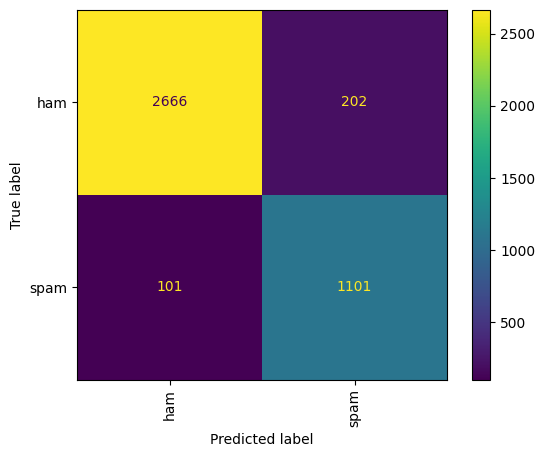

In [19]:

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [20]:
from sklearn.pipeline import Pipeline

final_model = Pipeline(steps=[
    ('vectorizer', vectorizer),
    ('pca', pca),
    ('model', model)
])

final_model

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=3000, stop_words='english',
                                 tokenizer=<__main__.MyTokenizer object at 0x7a3429ea6d70>)),
                ('pca', TruncatedSVD(n_components=1000)),
                ('model', LogisticRegression(class_weight='balanced'))])